In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


uppcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\upccig.csv", encoding='latin-1')
wcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\wcig.csv")

df = pd.merge(uppcig, wcig, on='UPC', how='inner')

C:\Users\mhand\AppData\Local\Temp\ipykernel_43452\3288216554.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  wcig = pd.read_csv(r"C:\Users\mhand\Documents\D S D M\Econ_DM\ProblemSet5\wcig.csv")


In [3]:
df

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM,STORE,WEEK,MOVE,QTY,PRICE,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX
0,700,190,KING CARTON CIGS (PL,1 CT,1,86040,8,194,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
1,700,190,KING CARTON CIGS (PL,1 CT,1,86040,8,195,2,1,21.51,NaN,50.49,1,4035828F5C28F5C3,40493EB851EB851F
2,700,190,KING CARTON CIGS (PL,1 CT,1,86040,8,196,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
3,700,190,KING CARTON CIGS (PL,1 CT,1,86040,8,197,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
4,700,190,KING CARTON CIGS (PL,1 CT,1,86040,8,198,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398192,705,8640912356,PARODI KINGS,5 EA,10,88710,139,388,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
5398193,705,8640912356,PARODI KINGS,5 EA,10,88710,139,391,0,1,0.00,NaN,0.00,1,0000000000000000,0000000000000000
5398194,705,8640912356,PARODI KINGS,5 EA,10,88710,139,392,2,1,1.69,NaN,1.42,1,3FFB0A3D70A3D70A,3FF6B851EB851EB8
5398195,705,8640912356,PARODI KINGS,5 EA,10,88710,139,393,2,1,1.69,NaN,1.42,1,3FFB0A3D70A3D70A,3FF6B851EB851EB8


In [4]:
df.PRICE.describe()

count    5.398197e+06
mean     2.589419e+00
std      5.875146e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.350000e+00
max      2.500000e+02
Name: PRICE, dtype: float64

In [5]:
len(df) - df.SALE.isna().sum() #only 21 rows SALE, not much we can do with that

21

<Axes: >

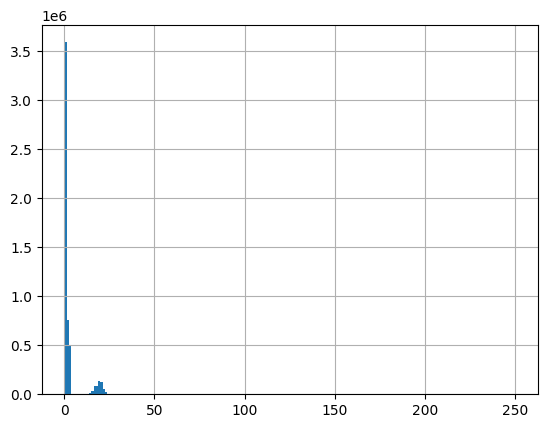

In [6]:
df.PRICE.hist(bins=200)

In [7]:
condition2 = (df['OK'] == 1) & (df['PRICE'] > 0)
df3 = df.loc[condition2]
df3.groupby('SIZE')['PRICE'].mean().sort_values()

SIZE
.75 OZ     0.893774
5 CT       0.995405
4 CT       1.290000
5 EA       1.580909
10 EA      1.590000
2/1.5O     1.750000
PACK       2.182500
1.2 O      2.390000
1 CT       2.444735
2PK        4.280000
50 CT     16.990000
10 PK     19.051249
10 CT     19.346854
Name: PRICE, dtype: float64

In [8]:
df3.groupby('SIZE')['MOVE'].mean().sort_values()

SIZE
2PK        1.000000
10 EA      1.285714
50 CT      1.333333
4 CT       1.461538
2/1.5O     1.500000
10 CT      1.548767
10 PK      1.641302
PACK       2.000000
.75 OZ     2.245283
5 CT       2.459459
5 EA       7.886364
1.2 O      9.383420
1 CT      11.773385
Name: MOVE, dtype: float64

In [9]:
df.columns

Index(['COM_CODE', 'UPC', 'DESCRIP', 'SIZE', 'CASE', 'NITEM', 'STORE', 'WEEK',
       'MOVE', 'QTY', 'PRICE', 'SALE', 'PROFIT', 'OK', 'PRICE_HEX',
       'PROFIT_HEX'],
      dtype='object')

In [10]:
############# FOURTH OF JULY YEAAAAAAAAAAAAA 'MURICA RRRRAAAAAAAHHH LETS SMOKE BABY ####################

condition_fourth = (df['OK'] == 1) & (df['PRICE'] > 0) & (df['WEEK'].isin([7, 11, 15, 16, 23, 28, 37, 42, 51, 59, 63,
                                                                            67, 68, 75, 81, 89, 95, 103, 112, 116, 119,
                                                                            120, 128, 133, 141, 147, 156, 164, 168, 172,
                                                                            173, 180, 185, 194, 199, 208, 216, 220, 224, 
                                                                            225, 232, 238, 246, 251, 260, 268, 272, 276, 
                                                                            277, 284, 289, 298, 303, 312, 320, 324, 328, 
                                                                            329, 336, 341, 350, 356, 364, 372, 377, 380, 
                                                                            381, 389, 393])) & (df['SIZE'].isin(['1 CT', '4 CT', '5 CT', '10 CT', '50 CT']))
df4 = df.loc[condition_fourth]

In [22]:
df4.loc[df4['MOVE'] > 1000]

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM,STORE,WEEK,MOVE,QTY,...,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX,oneCT,tenCT,fourCT,fiveCT,fiftyCT
52126,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,2,15,1109,1,...,NaN,94.78,1,40003D70A3D70A3D,4057B1EB851EB852,1.0,0.0,0.0,0.0,0.0
52127,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,2,16,1068,1,...,NaN,94.78,1,40003D70A3D70A3D,4057B1EB851EB852,1.0,0.0,0.0,0.0,0.0
52134,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,2,23,1097,1,...,NaN,94.78,1,40003D70A3D70A3D,4057B1EB851EB852,1.0,0.0,0.0,0.0,0.0
52153,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,2,42,1102,1,...,NaN,94.73,1,4000147AE147AE14,4057AEB851EB851F,1.0,0.0,0.0,0.0,0.0
52391,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,5,7,1365,1,...,NaN,94.42,1,3FFE666666666666,40579AE147AE147B,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73710,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,132,75,1075,1,...,NaN,95.25,1,4001D70A3D70A3D7,4057D00000000000,1.0,0.0,0.0,0.0,0.0
73716,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,132,81,1087,1,...,NaN,95.25,1,4001D70A3D70A3D7,4057D00000000000,1.0,0.0,0.0,0.0,0.0
74107,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,134,67,1148,1,...,NaN,94.33,1,3FFDEB851EB851EC,4057951EB851EB85,1.0,0.0,0.0,0.0,0.0
74108,705,197,CIGARETTES SINGLE PA,1 CT,10,80120,134,68,1135,1,...,NaN,94.33,1,3FFDEB851EB851EC,4057951EB851EB85,1.0,0.0,0.0,0.0,0.0


(0.0, 60.0)

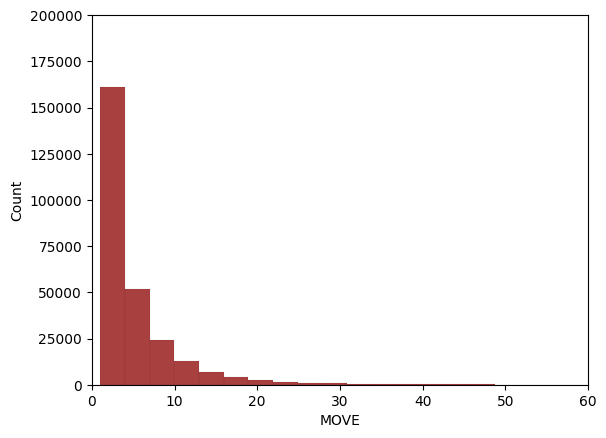

In [11]:
sns.histplot(df4, x='MOVE', bins=1000, color='darkred')
plt.ylim(0, 200000)
plt.xlim(0, 60)

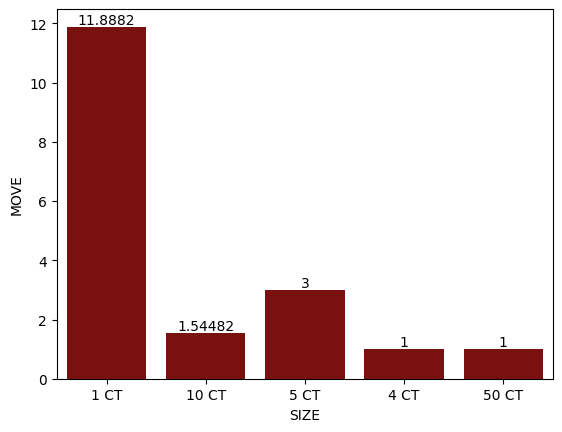

In [12]:
ax = sns.barplot(df4, x='SIZE', y='MOVE', color='darkred', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)

Text(0.5, 0, 'PRICE')

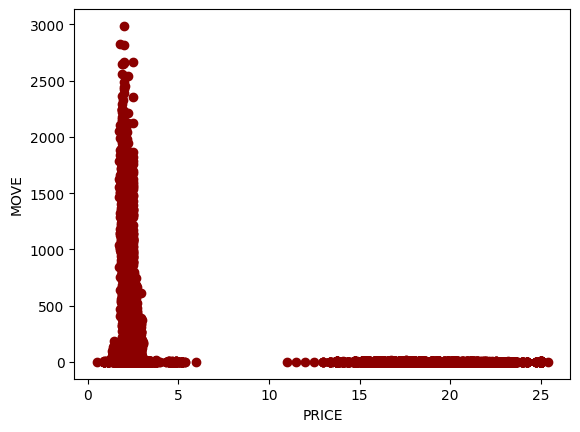

In [27]:
plt.scatter(x = df4['PRICE'], y = df4['MOVE'], color='darkred')
plt.ylabel('MOVE')
plt.xlabel('PRICE')

Text(0.5, 1.0, 'MOVE by SIZE')

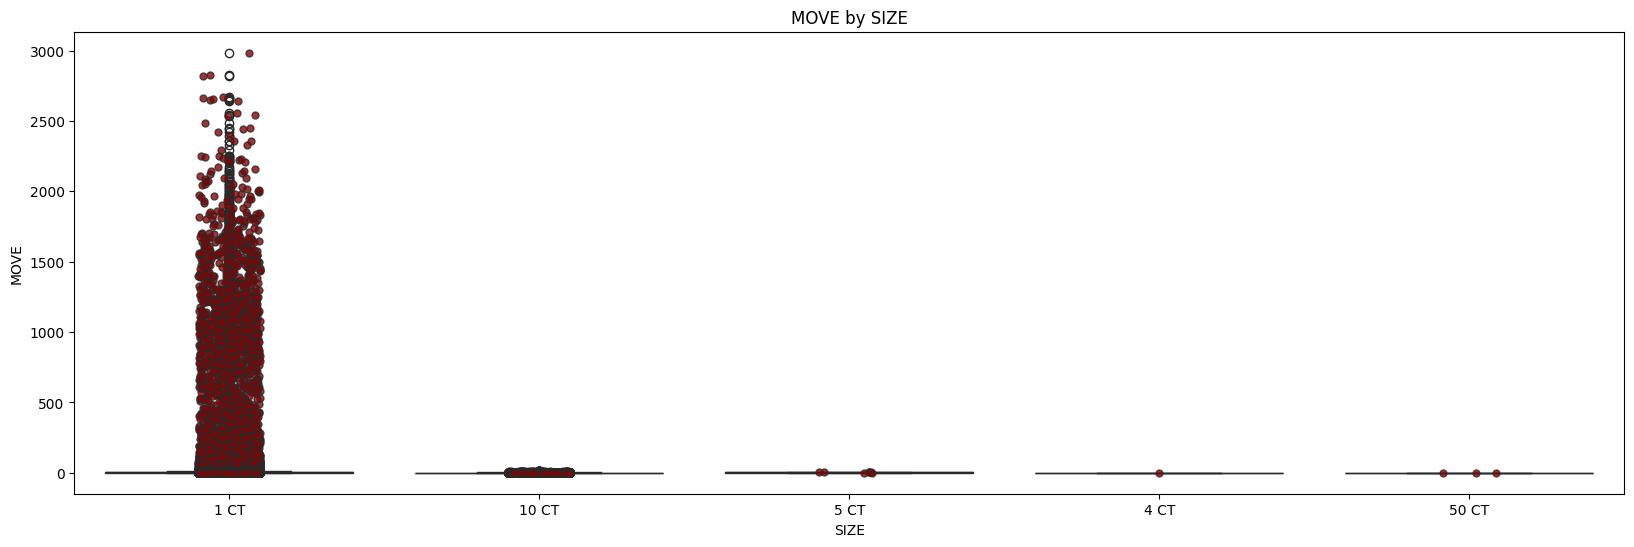

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='SIZE', y="MOVE", data=df4, ax=ax, color='darkred')
sns.stripplot(data=df4, x='SIZE', y='MOVE', ax=ax, linewidth=1, color='darkred', alpha=.8)
ax.set_title('MOVE by SIZE')

In [15]:
# df4 = df4.loc[df['UPC'].isin([2820000156, 2820000159, 2820000270, 2820000271,
#                               2820000274, 2820000275, 2820000801, 2820000818,
#                               2820000819, 2820000821, 2820000829, 2820000848,
#                               2820000853, 2820000866, 2820000869, 2820010180,
#                               2820010190, 2820010480, 2820010530, 2820010665,
#                               2820011566, 2820011596, 2820012700, 2820012705,
#                               2820012710, 2820012740, 2820012750])]

In [16]:

encoded_df = pd.get_dummies(df4.SIZE, dtype=float)
encoded_df.columns = encoded_df.columns.str.replace(' ', '')
encoded_df.columns = encoded_df.columns.str.replace('10', 'ten')
encoded_df.columns = encoded_df.columns.str.replace('1', 'one')
encoded_df.columns = encoded_df.columns.str.replace('4', 'four')
encoded_df.columns = encoded_df.columns.str.replace('50', 'fifty')
encoded_df.columns = encoded_df.columns.str.replace('5', 'five')

df4 = pd.concat([df4, encoded_df], axis=1)
df4

,COM_CODE,UPC,DESCRIP,SIZE,CASE,NITEM,STORE,WEEK,MOVE,QTY,...,SALE,PROFIT,OK,PRICE_HEX,PROFIT_HEX,oneCT,tenCT,fourCT,fiveCT,fiftyCT
461,700,190,KING CARTON CIGS (PL,1 CT,1,86040,84,199,1,1,...,NaN,50.48,1,4035828F5C28F5C3,40493D70A3D70A3D,1.0,0.0,0.0,0.0,0.0
781,700,190,KING CARTON CIGS (PL,1 CT,1,86040,101,199,1,1,...,S,-77.79,1,4017F5C28F5C28F6,C053728F5C28F5C3,1.0,0.0,0.0,0.0,0.0
1077,700,190,KING CARTON CIGS (PL,1 CT,1,86040,107,199,1,1,...,NaN,50.48,1,4035828F5C28F5C3,40493D70A3D70A3D,1.0,0.0,0.0,0.0,0.0
1956,700,190,KING CARTON CIGS (PL,1 CT,1,86040,137,194,2,1,...,NaN,22.86,1,4000000000000000,4036DC28F5C28F5C,1.0,0.0,0.0,0.0,0.0
2033,700,191,100'S CARTON CIGS (P,1 CT,1,86060,14,199,1,1,...,NaN,49.97,1,4035E3D70A3D70A4,4048FC28F5C28F5C,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397390,700,8030070813,KING CARTON,10 CT,1,86000,139,251,1,1,...,NaN,46.40,1,4033DEB851EB851F,4047333333333333,0.0,1.0,0.0,0.0,0.0
5397393,700,8030070813,KING CARTON,10 CT,1,86000,139,276,1,1,...,NaN,46.40,1,4033DEB851EB851F,4047333333333333,0.0,1.0,0.0,0.0,0.0
5397394,700,8030070813,KING CARTON,10 CT,1,86000,139,277,1,1,...,NaN,46.40,1,4033DEB851EB851F,4047333333333333,0.0,1.0,0.0,0.0,0.0
5397896,705,8030084699,CIGARETTES (SINGLE P,1 CT,1,86110,95,341,1,1,...,NaN,68.99,1,4004A3D70A3D70A4,40513F5C28F5C28F,1.0,0.0,0.0,0.0,0.0


In [17]:
X = df4[['PRICE', 'fourCT', 'fiveCT', 'tenCT', 'fiftyCT']]
y = df4['MOVE']

In [18]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [19]:
model.coef_

array([ -2.098826  , -13.30106482, -11.96069585,  25.24390549,
        19.65050343])

In [20]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# I try the first regression model
#regresion model with the statsmodels package
model = sm.OLS.from_formula('MOVE ~ PRICE + fourCT + fiveCT + tenCT + fiftyCT', data=df4).fit()
#output with stargazer package
show_model = Stargazer([model])
show_model

In [21]:
y_pred = model.predict(X)
mse = np.mean((y - y_pred) ** 2)
rmse = mse ** 0.5
rmse

79.4536539556512